# ANALYZING FLIGHT DELAYS

![Plane departing the Pacific Northwest](IMG_8801.JPG)

A prominent airline company in the Pacific Northwest has accumulated extensive data related to flights and weather patterns and needs to understand the factors influencing the departure delays and cancellations to benefit both airlines and passengers. As the data analyst on the team, you decide to embark on this analytical project.

The aviation industry is dynamic with various variables impacting flight operations. To ensure the relevance and applicability of your findings, you choose to focus solely on flights from the 'pnwflights2022' datasets available from the ModernDive team exported as CSV files. These datasets provide comprehensive information on flights departing in the first half of 2022 from both of the two major airports in this region: SEA (Seattle-Tacoma International Airport) and PDX (Portland International Airport): 

- `flights2022.csv` contains information about about each flight including 

| Variable   | Description                                          |
|------------|------------------------------------------------------|
| `dep_time`   | Departure time (in the format hhmm) where`NA` corresponds to a cancelled flight        |
| `dep_delay`  | Departure delay, in minutes (negative for early)    |
| `origin`     | Origin airport where flight starts (IATA code)
| `airline`    | Carrier/airline name                        |
| `dest`       | Destination airport where flight lands (IATA code)  

- `flights_weather2022.csv` contains the same flight information as well as weather conditions such as 
 
| Variable   | Description                                           |
|------------|-------------------------------------------------------|
| `visib`      | Visibility (in miles)                                 |
| `wind_gust`  | Wind gust speed (in mph)  

### Project Requirements

Which airlines and routes (for example "PDX-SFO") are most affected by flight delays, and what impact does wind have on departure delays?

Load the two CSV files into separate DataFrames. 

Explore the data and create any new columns that might benefit your analysis.

For routes, calculate the average departure delays and highest number of canceled flights and store this as a DataFrame called routes_delays_cancels, resetting the index after calculating.

For airlines, determine the average departure delays and the highest number of canceled flights and store this as a DataFrame called airlines_delays_cancels, resetting the index after calculating.

Produce two bar graphs to show:
1. the top 9 highest number of cancellations by route in a plot called top9_route_cancels_bar and 
2. the top 9 highest average departure delays by airline in a plot called top9_airline_delays_bar.
    
Determine if 10 mile per hour wind gusts or more have a larger average departure delay for both of SEA and PDX, setting wind_response to True if so and False if not.

### Importing the required libraries

In [2]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt

### Loading the data `flights2022` and `flights_weather2022`

In [3]:
# Load the data
flights2022 = pd.read_csv("flights2022.csv")
flights_weather2022 = pd.read_csv("flights_weather2022.csv")

### Creating a column

In [4]:
# Create route column
flights2022["route"] = flights2022["origin"] + "-" + flights2022["dest"]

### Calculating the mean departure delay and number of canceled flights

In [5]:
# Calculate mean departure delay and number of canceled flights for each unique flight route
routes_delays_cancels = flights2022.groupby("route").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()


### Identifying the routes with the highest mean departure delays and number of cancellations

In [6]:
# Identify routes with the highest mean departure delays
top_routes_by_delay = routes_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

# Identify routes with the highest number of cancellations
top_routes_by_cancellations = routes_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

### Plotting a bar graph for highest number of cancellations

/tmp/ipykernel_130182/4004860333.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)


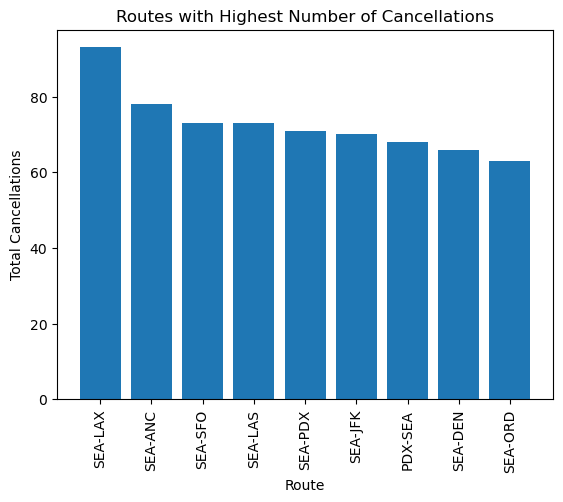

In [7]:
# Create a bar graph for highest number of cancellations
top9_route_cancels_bar, ax = plt.subplots()
ax.bar(top_routes_by_cancellations["route"], top_routes_by_cancellations["total_cancellations"])
ax.set_xlabel("Route")
ax.set_ylabel("Total Cancellations")
ax.set_title("Routes with Highest Number of Cancellations")
ax.set_xticklabels(top_routes_by_cancellations["route"], rotation=90)
plt.show()
plt.close()

### Calculating the mean departure delays and total cancellations by airline

In [8]:
# Find mean departure delays and total cancellations by airline
airlines_delays_cancels = flights2022.groupby("airline").agg(
    mean_dep_delay=("dep_delay", "mean"),
    total_cancellations=("dep_time", lambda x: x.isna().sum())
).reset_index()


### Identifying the airlines with the highest mean departure delay

In [9]:
# Identify airlines with the highest mean departure delay
top_airlines_by_delay = airlines_delays_cancels.sort_values("mean_dep_delay", ascending=False).head(9)

### Identifying the airlines with the highest number of cancellations

In [10]:
# Identify airlines with the highest number of cancellations
top_airlines_by_cancellations = airlines_delays_cancels.sort_values("total_cancellations", ascending=False).head(9)

### Plotting the bar graph for highest mean depearture delay

/tmp/ipykernel_130182/1252014278.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)


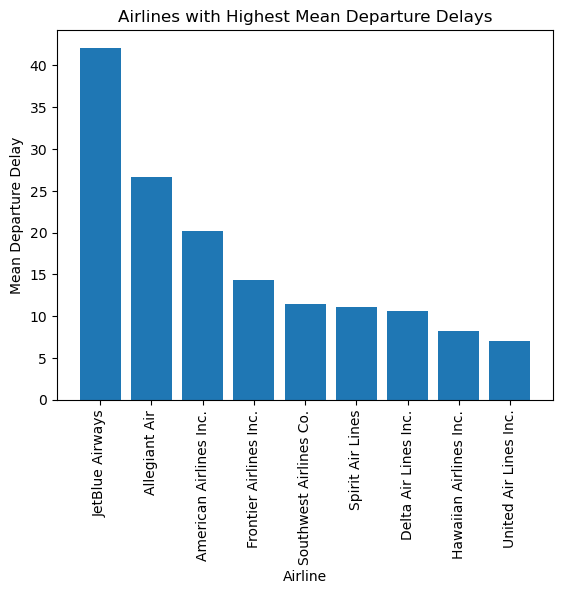

In [11]:
# Create a bar graph for highest mean depearture delay
top9_airline_delays_bar, ax = plt.subplots()
ax.bar(top_airlines_by_delay["airline"], top_airlines_by_delay["mean_dep_delay"])
ax.set_xlabel("Airline")
ax.set_ylabel("Mean Departure Delay")
ax.set_title("Airlines with Highest Mean Departure Delays")
ax.set_xticklabels(top_airlines_by_delay["airline"], rotation=90)
plt.show()

### Does departure delays impacted by 10+ mph winds from each airport?

In [12]:
# Are departure delays impacted by 10+ mph winds from each airport
flights_weather2022["group"] = flights_weather2022["wind_gust"].apply(lambda x: ">= 10mph" if x >= 10 else "< 10 mph")
wind_grouped_data = flights_weather2022.groupby(["group", "origin"]).agg(
    mean_dep_delay=("dep_delay", "mean")
)

print(wind_grouped_data)

wind_response = True

                 mean_dep_delay
group    origin                
< 10 mph PDX           6.686966
         SEA           7.857595
>= 10mph PDX           9.147024
         SEA           9.231060


### Conclusions

1. For flights departing from PDX (Portland International Airport):

When wind speed is less than 10 mph ("< 10 mph"), the mean departure delay is approximately 6.69 minutes.
When wind speed is greater than or equal to 10 mph (">= 10 mph"), the mean departure delay increases to approximately 9.15 minutes.

2. For flights departing from SEA (Seattle-Tacoma International Airport):

When wind speed is less than 10 mph ("< 10 mph"), the mean departure delay is approximately 7.86 minutes.
When wind speed is greater than or equal to 10 mph (">= 10 mph"), the mean departure delay increases slightly to approximately 9.23 minutes.

In conclusion, there seems to be an association between wind conditions and departure delays, with flights experiencing higher mean departure delays when the wind speed is 10 mph or greater, especially noticeable at PDX. However, it's important to note that correlation does not imply causation, and other factors may contribute to the observed patterns. Further analysis and consideration of additional variables would be needed to draw more definitive conclusions.